<a href="https://colab.research.google.com/github/uttamsingh012/Blog-List/blob/main/cats_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/,kaggle
!cp.kaggle.json ~/.kaggle/

/bin/bash: line 1: cp.kaggle.json: command not found


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 134MB/s]
100% 1.06G/1.06G [00:09<00:00, 121MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators (divide large no. of into images into small batches)
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


# validation
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 109ms/step - loss: 1.3778 - accuracy: 0.5736 - val_loss: 0.6469 - val_accuracy: 0.6068
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6064 - accuracy: 0.6722 - val_loss: 0.5752 - val_accuracy: 0.7010
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5298 - accuracy: 0.7386 - val_loss: 0.5834 - val_accuracy: 0.6888
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4819 - accuracy: 0.7796 - val_loss: 0.5381 - val_accuracy: 0.7338
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4133 - accuracy: 0.8135 - val_loss: 0.6127 - val_accuracy: 0.7108
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3476 - accuracy: 0.8484 - val_loss: 0.6994 - val_accuracy: 0.7472
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2685 - accuracy: 0.8862 - val_loss: 0.4786 - val_ac

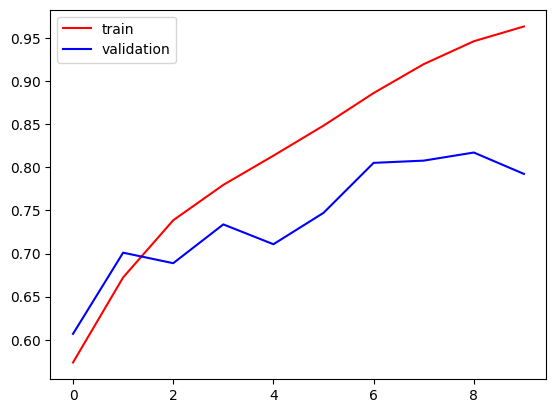

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

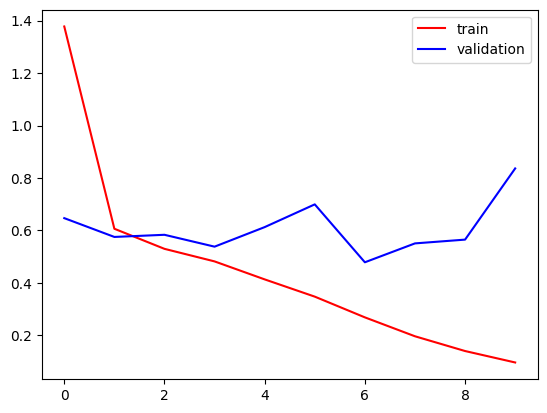

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [14]:
test_img = cv2.imread('/content/dog1.jpg')

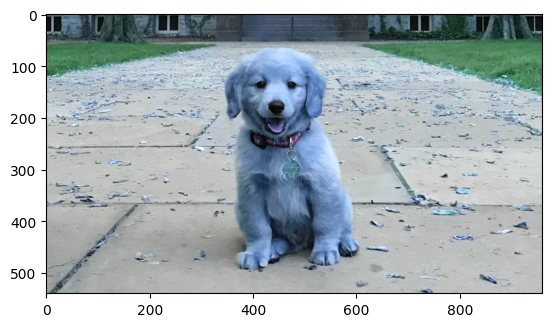

In [15]:
plt.imshow(test_img)

In [16]:
test_img.shape

(540, 960, 3)

In [17]:
test_img = cv2.resize(test_img,(256,256))

In [18]:
test_imput = test_img.reshape((1,256,256,3))

In [19]:
model.predict(test_imput)

1/1 [==============================] - 1s 509ms/step


array([[1.]], dtype=float32)

In [25]:
# test in cat
test_img = cv2.imread('/content/red-white-cat-i-white-studio.jpg')


In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_imput = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_imput)

1/1 [==============================] - 0s 121ms/step


array([[1.]], dtype=float32)